In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("../health_infrastructure.csv")

In [3]:
df.head()

,Country,Year,Hospital_density,gdp,Communicable_disease,Hospital_Expenditure,Total_Health_Expenditure,Injury Count,life_expectancy,Mortality,Population
0,Australia,2000,6.648,4.158450e+11,35.6,2.987,7.594,138.30,79.2,676.8,19028802.0
1,Australia,2001,6.656,3.793580e+11,53.3,3.024,7.678,141.76,79.6,667.5,19274701.0
2,Australia,2002,6.586,3.955730e+11,32.2,3.123,7.876,142.60,79.9,682.5,19495210.0
3,Australia,2003,6.521,4.674980e+11,29.3,3.157,7.881,143.47,80.2,668.3,19720737.0
4,Australia,2004,6.477,6.143260e+11,46.4,3.250,8.087,144.10,80.5,663.8,19932722.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   897 non-null    object 
 1   Year                      897 non-null    int64  
 2   Hospital_density          897 non-null    float64
 3   gdp                       897 non-null    float64
 4   Communicable_disease      897 non-null    float64
 5   Hospital_Expenditure      897 non-null    float64
 6   Total_Health_Expenditure  897 non-null    float64
 7   Injury Count              897 non-null    float64
 8   life_expectancy           897 non-null    float64
 9   Mortality                 897 non-null    float64
 10  Population                897 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 77.2+ KB


In [5]:
# encode Country variable to resolve ValueEror when training the model
# label_encoder = LabelEncoder()

# df['Country'] = label_encoder.fit_transform(df['Country'])

In [6]:
features = df.drop(columns=['Country', 'Hospital_density'])
target = df['Hospital_density']

### ***Correlation***

In [7]:
features.corrwith(target)


Year                       -0.042157
gdp                        -0.021798
Communicable_disease        0.089968
Hospital_Expenditure        0.500842
Total_Health_Expenditure   -0.069142
Injury Count               -0.081538
life_expectancy            -0.167741
Mortality                  -0.202806
Population                  0.074867
dtype: float64

*In the above result there only appear to be a strong correlation between the **Hospital_density** and **Hospital_Expenditure***

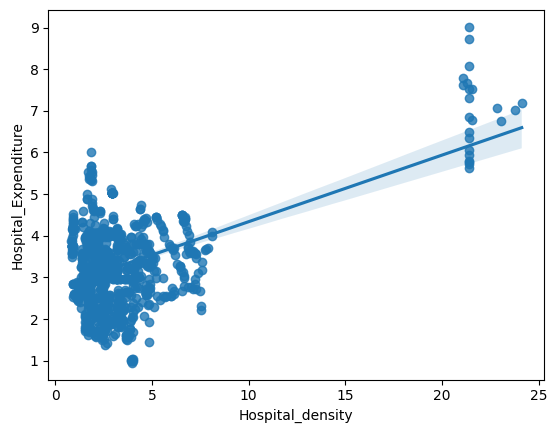

In [8]:
# visualising the regression plot for both correlating variables

sns.regplot(x='Hospital_density', y='Hospital_Expenditure', data=df)
plt.show()

In [9]:
# features = df[['Hospital_Expenditure']]
features = features.drop(columns=['Communicable_disease'])

features.head()

,Year,gdp,Hospital_Expenditure,Total_Health_Expenditure,Injury Count,life_expectancy,Mortality,Population
0,2000,4.158450e+11,2.987,7.594,138.30,79.2,676.8,19028802.0
1,2001,3.793580e+11,3.024,7.678,141.76,79.6,667.5,19274701.0
2,2002,3.955730e+11,3.123,7.876,142.60,79.9,682.5,19495210.0
3,2003,4.674980e+11,3.157,7.881,143.47,80.2,668.3,19720737.0
4,2004,6.143260e+11,3.250,8.087,144.10,80.5,663.8,19932722.0


### ***Data splitting***

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=24)

In [11]:
reg_model = LinearRegression()

In [12]:
reg_model.fit(x_train, y_train)

LinearRegression()

In [13]:
reg_pred = reg_model.predict(x_test)

reg_pred[:10]

array([ 4.89509647,  2.4814478 ,  4.60015872,  3.18872498, 18.36927016,
        2.55638412,  1.82309347,  0.10882157,  1.27749698,  3.48898919])

### ***Evaluating and measuring model's performance***

In [14]:
# using Mean absolute error

mae = mean_absolute_error(y_test, reg_pred)
round(mae, 3)

1.819

*This **mae** value indicates that the prediction is close to the true value*

In [15]:
# using Residual sum of squares

rss = np.sqrt(mean_squared_error(y_test, reg_pred))

round(rss, 3)

2.286

In [16]:
# r-squared

rsquared = r2_score(y_test, reg_pred)

round(rsquared, 3)

0.612

*This r-squared value indicates that roughly **30%** variaton in our data was explained by our model*

In [17]:
# accuracy = accuracy_score(y_true=y_test, y_pred=predictions) #fixing same ValueError

# print("Accuracy: {}".format(round(accuracy*100), 2))

In [18]:
xgb_model = xgb.XGBRegressor()

In [19]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
xgb_pred = xgb_model.predict(x_test)

xgb_pred[:10]

array([ 2.138767 ,  2.7689104,  1.3850176,  2.4122217, 21.073627 ,
        4.6143966,  4.7807755,  1.6700609,  2.2871528,  7.0670557],
      dtype=float32)

In [21]:
# accuracy = accuracy_score(y_true=y_test, y_pred=xgb_pred) 

In [37]:
# Let's say we want to predict the hospital density for the year 2025

def predict_health_density(features):
    pred = xgb_model.predict(future_data)
    print("For {} year, the predicted health density is {}".format(features.iloc[0, 0], round(float(pred[0]), 3)))


future_data = pd.DataFrame({
    'Year': [2025],
    'gdp': 3.793580e+11,
    'Hospital_Expenditure': 3.250,
    'Total_Health_Expenditure': 8.475,
    'Injury Count': 546.2	,
    'life_expectancy': 80.7,
    'Mortality': 1026.4,
    'Population': 19274701.0
})

predict_health_density(future_data)
# future_prediction
# f'Predicted Hospital Density for 2025: {future_prediction[0]}'

For 2025 year, the predicted health density is 2.492
